### Library 가져오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 전처리

In [2]:
data = pd.read_csv("./data/mitbih_train.csv", header=None)
df = pd.DataFrame(data)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
null_col = []

for i in df.columns:
    print(i, "\t-\t", df[i].isna().mean()*100)
    if df[i].isna().mean()*100 > 0:
        null_col.append(i)

0 	-	 0.0
1 	-	 0.0
2 	-	 0.0
3 	-	 0.0
4 	-	 0.0
5 	-	 0.0
6 	-	 0.0
7 	-	 0.0
8 	-	 0.0
9 	-	 0.0
10 	-	 0.0
11 	-	 0.0
12 	-	 0.0
13 	-	 0.0
14 	-	 0.0
15 	-	 0.0
16 	-	 0.0
17 	-	 0.0
18 	-	 0.0
19 	-	 0.0
20 	-	 0.0
21 	-	 0.0
22 	-	 0.0
23 	-	 0.0
24 	-	 0.0
25 	-	 0.0
26 	-	 0.0
27 	-	 0.0
28 	-	 0.0
29 	-	 0.0
30 	-	 0.0
31 	-	 0.0
32 	-	 0.0
33 	-	 0.0
34 	-	 0.0
35 	-	 0.0
36 	-	 0.0
37 	-	 0.0
38 	-	 0.0
39 	-	 0.0
40 	-	 0.0
41 	-	 0.0
42 	-	 0.0
43 	-	 0.0
44 	-	 0.0
45 	-	 0.0
46 	-	 0.0
47 	-	 0.0
48 	-	 0.0
49 	-	 0.0
50 	-	 0.0
51 	-	 0.0
52 	-	 0.0
53 	-	 0.0
54 	-	 0.0
55 	-	 0.0
56 	-	 0.0
57 	-	 0.0
58 	-	 0.0
59 	-	 0.0
60 	-	 0.0
61 	-	 0.0
62 	-	 0.0
63 	-	 0.0
64 	-	 0.0
65 	-	 0.0
66 	-	 0.0
67 	-	 0.0
68 	-	 0.0
69 	-	 0.0
70 	-	 0.0
71 	-	 0.0
72 	-	 0.0
73 	-	 0.0
74 	-	 0.0
75 	-	 0.0
76 	-	 0.0
77 	-	 0.0
78 	-	 0.0
79 	-	 0.0
80 	-	 0.0
81 	-	 0.0
82 	-	 0.0
83 	-	 0.0
84 	-	 0.0
85 	-	 0.0
86 	-	 0.0
87 	-	 0.0
88 	-	 0.0
89 	-	 0.0
90 	-	 0.0
91 	-	 0.

- 데이터에 Null 값이 없음을 화인

<AxesSubplot:xlabel='187', ylabel='count'>

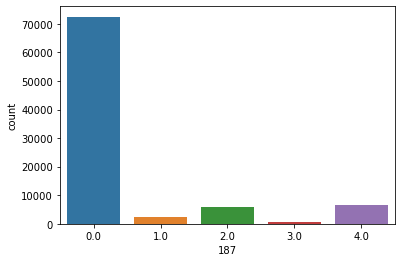

In [6]:
classes = []
sns.countplot(x=187, data=df)

- 여기서 데이터가 불균형적으로 이루어져 있고 대부분의 데이터가 Class 0으로 분류되었음을 알 수 있음. 따라서, 정확한 계산을 위해 데이터의 균형을 맞추는 것이 중요함
- 데이터 균형을 맞추기 위해 Class 0 으로 분류된 요소를 일부 줄이는 undersampling을 진행해야 함

In [7]:
class_1 = df[df[187]==1.0]
class_2 = df[df[187]==2.0]
class_3 = df[df[187]==3.0]
class_4 = df[df[187]==4.0]
class_0 = df[df[187]==0.0].sample(n = 8000)

In [8]:
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

In [9]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
33810,0.959432,0.991886,0.590264,0.129817,0.016227,0.052738,0.070994,0.075051,0.068966,0.064909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29108,0.934702,0.809702,0.287313,0.113806,0.044776,0.001866,0.000000,0.024254,0.093284,0.240672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13973,1.000000,0.927315,0.664713,0.595545,0.575615,0.555686,0.513482,0.493552,0.463072,0.440797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38461,0.975078,0.816199,0.333333,0.043614,0.068536,0.065421,0.040498,0.028037,0.009346,0.003115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9507,0.956973,0.836795,0.267062,0.000000,0.250742,0.289318,0.296736,0.305638,0.301187,0.302671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='187', ylabel='count'>

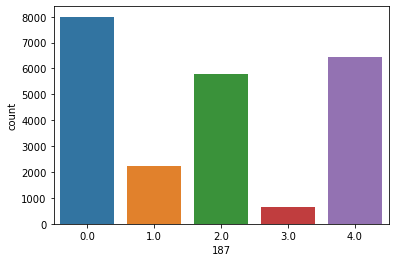

In [10]:
sns.countplot(x=187, data=new_df)

- 이제 각 클래스의 균형이 어느정도 맞춰졌음을 알 수 있음

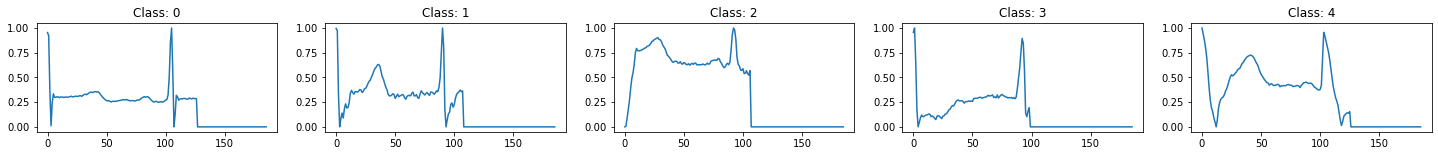

In [11]:
index = 0
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25, 2))

for i in range(5):
    ax[i].plot(new_df[new_df[187] == float(i)].sample(1).iloc[0, :186])
    ax[i].set_title("Class: " + str(i))

- 이제 데이터를 훈련, 테스트셋으로 나눔

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size = 0.1)

In [23]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [26]:
clf = Sequential()

clf.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
clf.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
clf.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

clf.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
clf.add(Dropout(0.5))

clf.add(Flatten())

clf.add(Dense(units = 512, activation='relu'))
clf.add(Dense(units = 1024, activation='relu'))

clf.add(Dense(units = 5, activation='softmax'))

In [27]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
y_train = np.asarray(y_train)
history = clf.fit(X_train, y_train, epochs = 10)

Train on 20774 samples
Epoch 1/10
20774/20774 [==============================] - 47s 2ms/sample - loss: 0.3832 - accuracy: 0.8659
Epoch 2/10
20774/20774 [==============================] - 50s 2ms/sample - loss: 0.2020 - accuracy: 0.9323
Epoch 3/10
20774/20774 [==============================] - 48s 2ms/sample - loss: 0.1580 - accuracy: 0.9455
Epoch 4/10
20774/20774 [==============================] - 49s 2ms/sample - loss: 0.1212 - accuracy: 0.9592
Epoch 5/10
20774/20774 [==============================] - 49s 2ms/sample - loss: 0.1052 - accuracy: 0.9639
Epoch 6/10
20774/20774 [==============================] - 52s 2ms/sample - loss: 0.0874 - accuracy: 0.9684
Epoch 7/10
20774/20774 [==============================] - 49s 2ms/sample - loss: 0.0721 - accuracy: 0.9747
Epoch 8/10
20774/20774 [==============================] - 51s 2ms/sample - loss: 0.0673 - accuracy: 0.9759
Epoch 9/10
20774/20774 [==============================] - 51s 2ms/sample - loss: 0.0559 - accuracy: 0.9797
Epoch 10/10
20

In [30]:
y_pred = clf.predict(X_test)

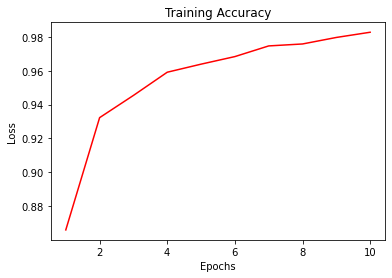

In [31]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

<AxesSubplot:>

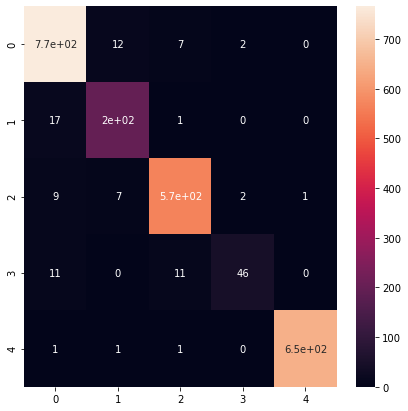

In [32]:
from sklearn.metrics import confusion_matrix

y_lbl = [np.where(i == np.max(i))[0][0] for i in y_pred]
mat = confusion_matrix(y_test, y_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [33]:
from sklearn import metrics

print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(y_lbl, y_test)))

Accuracy score of the predictions: 0.964053702901689
